# Pymaceuticals Inc.
---

### Analysis

- Drug Regimens Capomulin and Ramicane showed the highest number of observed mouse timepoints, indicating a strong focus on these treatments. Additionally, according to the pie plots, there was a higher distribution of male mice in the study. Quartile and outlier analysis revealed potential outliers for Infubinol, suggesting the need for further investigation. Notably, for a single mouse treated with Capomulin, the tumor volume was highest at a timepoint of approximately 20 days. Overall, this analysis provides a comprehensive overview of the animal study results and the performance of different drug regimens, which is crucial in supporting decision-making at Pymaceuticals, Inc.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_df.loc[combined_df["Mouse ID"] == "g989"]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df[combined_df["Mouse ID"] != duplicate_mice[0]]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_groups = cleaned_df.groupby('Drug Regimen')

mean = regimen_groups['Tumor Volume (mm3)'].mean()
median = regimen_groups['Tumor Volume (mm3)'].median()
variance = regimen_groups['Tumor Volume (mm3)'].var()
std = regimen_groups['Tumor Volume (mm3)'].std()

sem = regimen_groups['Tumor Volume (mm3)'].apply(lambda x: st.sem(x))

regimen_groups_df = pd.DataFrame({"Mean Tumor Volume": mean,
                            "Median Tumor Volume": median,
                            "Tumor Volume Variance": variance,
                            "Tumor Volume Std. Dev.": std,
                            "Tumor Volume Std. Err": sem})
regimen_groups_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
aggregation_summary = regimen_groups["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
aggregation_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

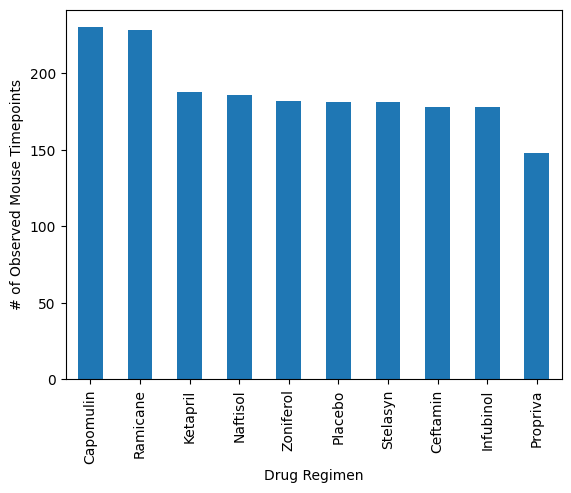

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_timepoints_counts = regimen_groups.size()
regimen_timepoints_counts = regimen_timepoints_counts.sort_values(ascending=False)
regimen_timepoints_counts.plot.bar()
plt.ylabel("# of Observed Mouse Timepoints")

Text(0, 0.5, '# of Observed Mouse Timepoints')

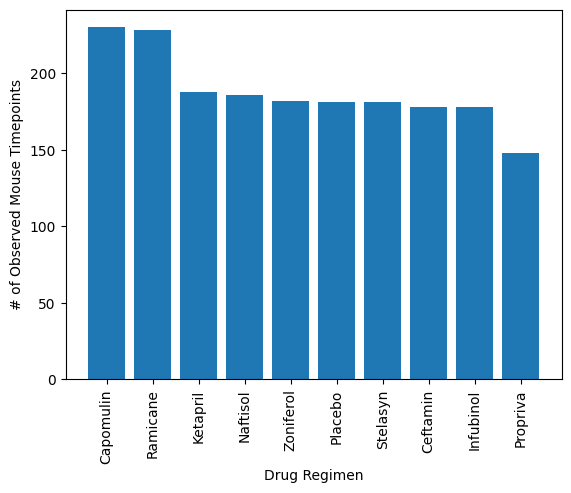

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_timepoints_counts.index, regimen_timepoints_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

<Axes: ylabel='Sex'>

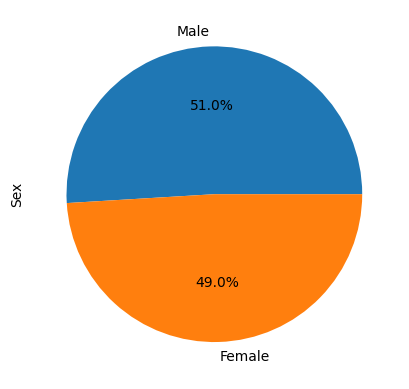

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_df["Sex"].value_counts()
gender_counts = gender_counts.rename("Sex")
gender_counts.plot.pie(autopct="%1.1f%%")

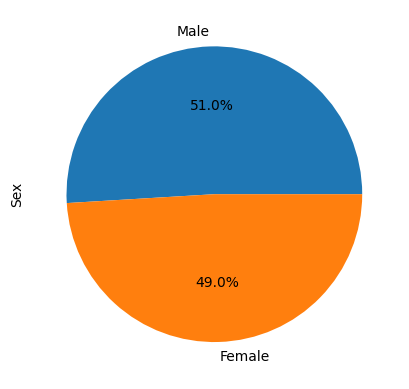

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts.values, labels=gender_counts.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_df = cleaned_df[cleaned_df["Drug Regimen"].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(filtered_df, last_timepoints, on=["Mouse ID", "Timepoint"])

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
selected_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Create a grouped DataFrame that shows the last time point for each mouse and merge it with the original DataFrame
last_timepoints = merged_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
merged_df = pd.merge(merged_df, last_timepoints, on=["Mouse ID", "Timepoint"], how="inner")

# Loop through each drug in the treatment list, locate the rows, and append the final tumor volumes
for treatment in selected_treatments:
    treatment_data = merged_df[merged_df["Drug Regimen"] == treatment]
    tumor_volumes = treatment_data["Tumor Volume (mm3)"].values
    tumor_volume_data.append(tumor_volumes)

# Calculate quartiles and IQR, and determine potential outliers
for i, treatment in enumerate(selected_treatments):
    quartiles = np.percentile(tumor_volume_data[i], [25, 50, 75])
    lower_quartile = quartiles[0]
    upper_quartile = quartiles[2]
    iqr = upper_quartile - lower_quartile

    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    potential_outliers = [x for x in tumor_volume_data[i] if (x < lower_bound) or (x > upper_bound)]

    print(f"Summary for {treatment}:")
    print(f"IQR: {iqr}")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {potential_outliers}\n")


Summary for Capomulin:
IQR: 7.781863460000004
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: []

Summary for Ramicane:
IQR: 9.098536719999998
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: []

Summary for Infubinol:
IQR: 11.477135160000003
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: [36.3213458]

Summary for Ceftamin:
IQR: 15.577752179999997
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []



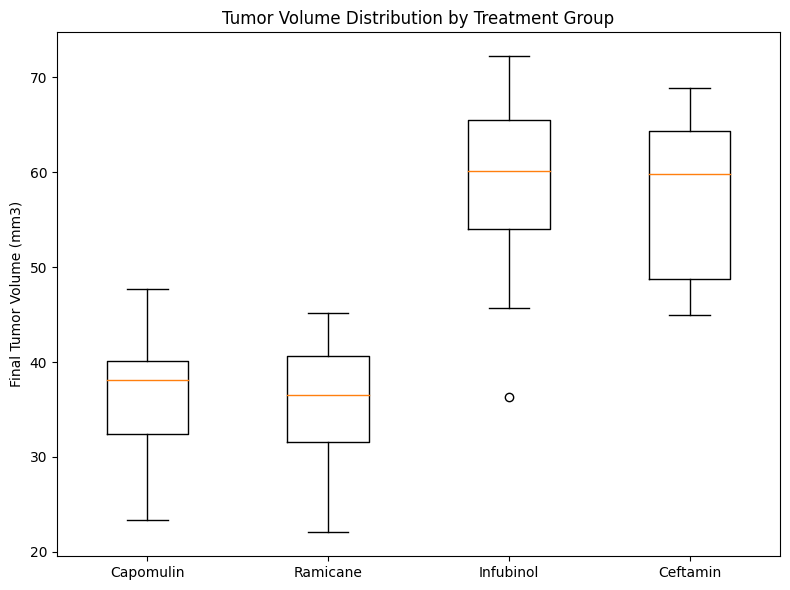

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of tumor volume data for each treatment group
data = tumor_volume_data

# Define labels for the box plot
labels = selected_treatments

# Create the vertical box plot
plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels)

# Customize the plot
plt.title('Tumor Volume Distribution by Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')

# Display the plot
plt.tight_layout()
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

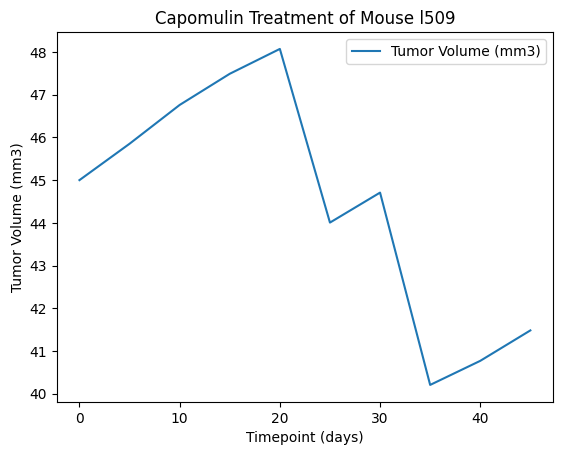

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_ID = "l509"
one_mouse_data = cleaned_df.loc[cleaned_df["Mouse ID"] == mouse_ID]
one_mouse_data.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment of Mouse {mouse_ID}")

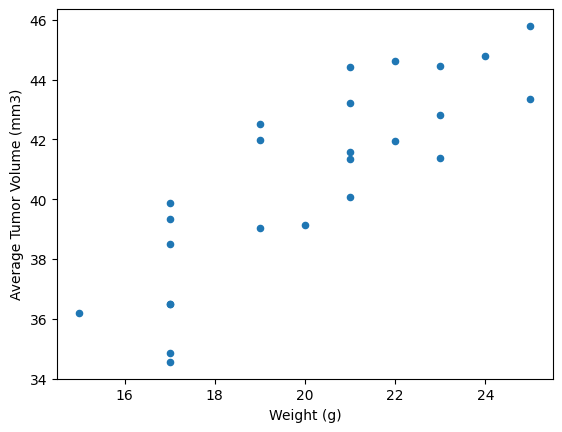

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
capomulin_avgs = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].unique()

data_to_graph = pd.merge(capomulin_avgs, capomulin_weights, on="Mouse ID")
scatter_plot = data_to_graph.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)")

# Customize the plot with the y-axis label
plt.ylabel("Average Tumor Volume (mm3)")

# Display the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is [0.84].


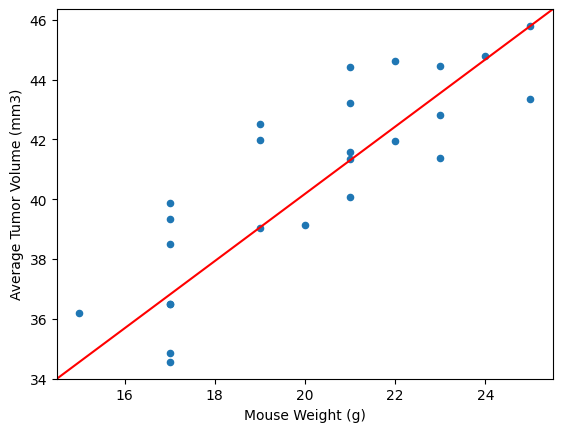

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regime
correlation_coeff = st.pearsonr(capomulin_weights, capomulin_avgs)
print(f"The correlation between mouse weight and the average tumor volume is {np.round(correlation_coeff[0], 2)}.")

# Create a scatter plot
data_to_graph.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)")

# Customize the plot with labels
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")  # Set the y-axis label

# Calculate the linear regression line
(x_min, x_max) = plt.xlim()
(y_min, y_max) = plt.ylim()
plt.axline((x_min, y_min), (x_max, y_max), color="red")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Display the plot
plt.show()